In [1]:
# !pip install networkx
from collections import defaultdict, deque
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def top_sort(tasks, graph):
    in_degree = {t: 0 for t in tasks}
    for u in graph:
        for v in graph[u]:
            in_degree[v] += 1
    
    queue = deque([t for t in tasks if in_degree[t] == 0])
    top_order = []
    
    while queue:
        node = queue.popleft()
        top_order.append(node)
        
        for neighbor in graph[node]:
            in_degree[neighbor] -= 1
            if in_degree[neighbor] == 0:
                queue.append(neighbor)
    
    return top_order

In [3]:
def mpcs(tasks, edges, delays):
    graph = defaultdict(list)
    dp = {t: 0 for t in tasks}
    
    for u, v in edges:
        graph[u].append(v)
    
    top_order = top_sort(tasks, graph)
    print("The order of the task completion:", top_order)
    
    for t in top_order:
        for v in graph[t]:
            dp[v] = max(dp[v], dp[t] + delays[t] + 1)
    
    finish_time = max(dp.values())
    
    return dp, finish_time

In [4]:
tasks = ['A', 'B', 'C', 'D', 'E']
edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E')]
delays = {'A': 2, 'B': 1, 'C': 2, 'D': 1, 'E': 0}

In [5]:
def draw_graph(tasks, edges, delays):
    G = nx.DiGraph()
    
    G.add_nodes_from(tasks)
    
    # Add edges with weights (delays)
    G.add_edges_from(edges)
    
    # Define positions for nodes using a layout
    pos = nx.spring_layout(G)
    
    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=3000, font_size=16, font_color='black', arrowstyle='-|>', arrowsize=20)
    
    # Draw the delays as separate text next to the nodes
    for node, (x, y) in pos.items():
        plt.text(x + 0.09, y - 0.075, s=f"Delay: {delays[node]}", bbox=dict(facecolor='white', alpha=0.5), horizontalalignment='center', fontsize=12, color='blue')
    
    # Show the plot
    plt.show()

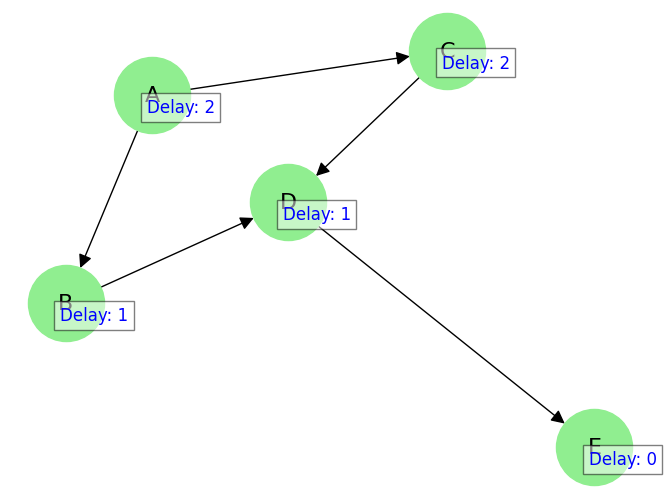

In [6]:
tasks = ['A', 'B', 'C', 'D', 'E']
edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E')]
delays = {'A': 2, 'B': 1, 'C': 2, 'D': 1, 'E': 0}
draw_graph(tasks, edges, delays)

In [7]:
dp, finish_time = mpcs(tasks, edges, delays)

print("Earliest completion times for each task:", dp)
print("Minimum finish time:", finish_time)

The order of the task completion: ['A', 'B', 'C', 'D', 'E']
Earliest completion times for each task: {'A': 0, 'B': 3, 'C': 3, 'D': 6, 'E': 8}
Minimum finish time: 8


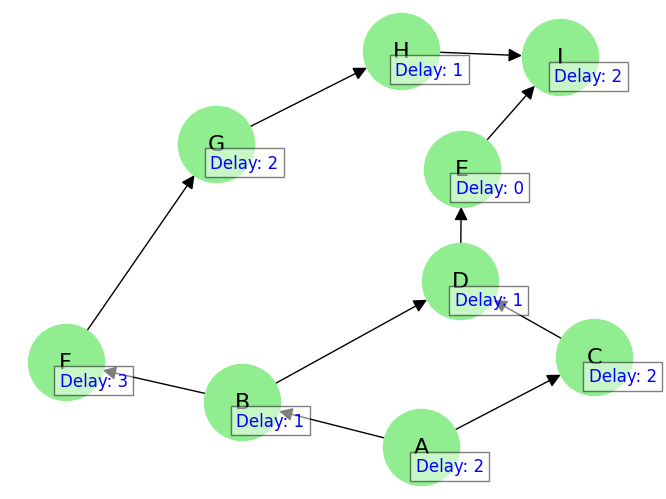

The order of the task completion: ['A', 'B', 'C', 'F', 'D', 'G', 'E', 'H', 'I']
Earliest completion times for each task: {'A': 0, 'B': 3, 'C': 3, 'D': 6, 'E': 8, 'F': 5, 'G': 9, 'H': 12, 'I': 14}
Minimum finish time: 14


In [8]:
tasks = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

edges = [
    ('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E'),
    ('B', 'F'), ('F', 'G'), ('G', 'H'), ('H', 'I'), ('E', 'I')
]

delays = {'A': 2, 'B': 1, 'C': 2, 'D': 1, 'E': 0, 'F': 3, 'G': 2, 'H': 1, 'I': 2}
draw_graph(tasks, edges, delays)

dp, finish_time = mpcs(tasks, edges, delays)

print("Earliest completion times for each task:", dp)
print("Minimum finish time:", finish_time)

### Za velike podatke 

In [14]:
# tasks = [f'T{i}' for i in range(1, 9990001)]

In [11]:
# import random

# edges = []
# for i in range(1, 9990001):
#     # Define the range of nodes that can be connected to
#     start = i + 1
#     end = min(i + 5, 9990001)  # Ensure we do not go out of bounds
#     # Compute the maximum number of targets we can sample
#     max_targets = end - start
#     if max_targets > 0:
#         num_connections = random.randint(1, min(5, max_targets))  # Random number of connections within the bounds
#         targets = random.sample(range(start, end), num_connections)
#         for target in targets:
#             edges.append((f'T{i}', f'T{target}'))

In [12]:
# import random

# delays = {f'T{i}': random.randint(1, 10) for i in range(1, 9990001)}

In [13]:
# dp, finish_time = mpcs(tasks, edges, delays)

# print("Earliest completion times for each task:", dp)
# print("Minimum finish time:", finish_time)